In [1]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def gravity():
    global x
    global y
    global vel
    global grid_size
    global g
    global no_particles
    
    for i in range(no_particles):
        if y[i] <= grid_size/4:
            vel[i] = -vel[i]/1.5
    
        else:
            vel[i] = vel[i] + g * timestep
    
        y[i] = y[i] + vel[i] * timestep
    
    return
  
def floor_update():
    global x2
    global y2
    global timestep
    global time
    
    for i in range(lg):
        y2[i] = np.sin(grid_size/4 * 0.785 * time + x2[i])
    time = time + timestep
    return

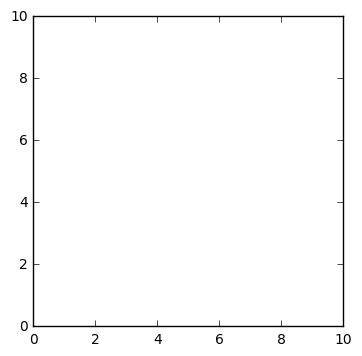

In [3]:
grid_size = 5
no_particles = 1
x = []
y = []
vel = []
timestep = 0.01
g = -98
time = 0
#fill area
lg = 50
x2 = np.linspace(0, grid_size * 2, lg)
y2 = []
for i in range(lg):
    y2.append(grid_size/4)   


for i in range(no_particles):
    x.append(grid_size/2)
    y.append(2 * grid_size)
    vel.append(np.random.rand() * -55)

fig = plt.figure()
ax = plt.axes(xlim=(0, grid_size*2), ylim=(0, grid_size*2), aspect='equal')

In [4]:
x1 = [0, 0, 3, 3]
y1 = [0, 1, 1, 0]
rect = np.column_stack([x1, y1])
line1, = ax.plot([], [], 'ks', marker = rect, markersize = 120)
line2, = ax.plot([], [], 'b', linewidth = 2)
lines = [line1, line2]

In [5]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return lines

In [ ]:
def animate(i):
    gravity()
    floor_update()
    line1.set_data(x, y)
    line2.set_data(x2, y2)
    ax.fill(x2, y2, 'b', alpha=0.3)
    fig.canvas.draw()
    return lines


In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 400, interval = 10, blit=True)
plt.show()
HTML(anim.to_html5_video())

C:\Users\Micky\Anaconda3\lib\site-packages\matplotlib\lines.py:863: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._marker.get_marker() in ('.', ','):
C:\Users\Micky\Anaconda3\lib\site-packages\matplotlib\lines.py:813: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if marker.get_marker() != ',':
